In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

#reading the dataset
df = pd.read_excel('dataset.xlsx')
df

,Question,Correct_Code,Code_with_Error,Type_of_Error,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Final_Marks,code_processed,code_with_question,code_comment,code_with_solution,ast
0,Sum of elements in an array,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,['3a'],2,2.0,2,2.0,2,10,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
1,Sum of elements in an array,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,['1b'],2,2.0,2,2.0,0,8,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
2,Sum of elements in an array,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,['1c'],2,2.0,1,1.0,1,7,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
3,Sum of elements in an array,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,"['1e', '2d']",2,1.0,1,1.0,0,5,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
4,Sum of elements in an array,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,['2b'],2,2.0,1,1.0,0,6,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Program to swap two numbers,"#include <stdio.h>\n \n void swap(int* num1, i...","#include <stdio.h>\n \n void swap(int* num1, i...","['1c', '1e', '2b', '2c']",1,0.0,0,0.0,0,1,"#include <stdio.h>\n \n void swap(int* num1, i...",/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
1172,Program to swap two numbers,"#include <stdio.h>\n \n void swap(int* num1, i...","#include <stdio.h>\n \n void swap(int* num1, i...",['1d'],2,2.0,2,1.0,1,8,"#include <stdio.h>\n \n void swap(int* num1, i...",/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
1173,Program to swap two numbers,"#include <stdio.h>\n \n void swap(int* num1, i...",#include <stdio.h>\n \n int main() {\n int nu...,"['1c', '1d', '1e', '2b', '2c']",2,0.0,0,0.0,0,2,#include <stdio.h>\n \n int main() {\n int nu...,/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
1174,Program to swap two numbers,"#include <stdio.h>\n \n void swap(int* num1, i...","#include <stdio.h>\n \n void swap(int* num1, i...",['2b'],2,2.0,1,2.0,1,8,"#include <stdio.h>\n \n void swap(int* num1, i...",/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\

In [2]:
#.isna() returns 1 if value is 1 and 0 if not for each val in each col . so if we sum its output using.sum() function , we will have number of null values in each col
df.isna().sum()

,0
Question,0
Correct_Code,0
Code_with_Error,0
Type_of_Error,0
Header_and_Main_Declaration,0
Incomprehensible_Code,1
Comprehensible_Code_with_logical_errors,0
Comprehensible_code_with_syntax_errors,2
Correct_code_and_output,0
Final_Marks,0


In [3]:
#filling missing values using pad , it is same like ffill method
df = df.fillna(method='pad')

<ipython-input-3-a0073afebf11>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


In [4]:
#cropping the dataset on which we have to work on , the other columns are just code snippets , these are the evaluation scores
df = df.iloc[:,4:10]
df

,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Final_Marks
0,2,2.0,2,2.0,2,10
1,2,2.0,2,2.0,0,8
2,2,2.0,1,1.0,1,7
3,2,1.0,1,1.0,0,5
4,2,2.0,1,1.0,0,6
...,...,...,...,...,...,...
1171,1,0.0,0,0.0,0,1
1172,2,2.0,2,1.0,1,8
1173,2,0.0,0,0.0,0,2
1174,2,2.0,1,2.0,1,8


In [5]:
#if final score is more than 5 , target value will be 1 , else 0 , these will be the 2 classes
#so codes with above 5 final score are like more fundamental , and below 5 are non fundamental , and this division happened based on values of columns 4 to 9
target = []
for val in df['Final_Marks']:
    if val < 5:
        target.append(0)
    else:
        target.append(1)
df['Target'] = target
df.drop('Final_Marks', axis = 1)

,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Target
0,2,2.0,2,2.0,2,1
1,2,2.0,2,2.0,0,1
2,2,2.0,1,1.0,1,1
3,2,1.0,1,1.0,0,1
4,2,2.0,1,1.0,0,1
...,...,...,...,...,...,...
1171,1,0.0,0,0.0,0,0
1172,2,2.0,2,1.0,1,1
1173,2,0.0,0,0.0,0,0
1174,2,2.0,1,2.0,1,1


ans1)


In [6]:
from sklearn.model_selection import train_test_split
#this is a utility function which helps us to split dataset into testing and traing data , different combinations are tried , whichever gives best output , we have that split of data
from sklearn.neighbors import KNeighborsClassifier
#KNeighborsClassifier is class to perform the classification
from sklearn.metrics import confusion_matrix, classification_report
#confusin_matrix is a utility function to create confusing matrix taking acutal and predicted values as input
#classification_report is another lib function to calculate , accuracy precision , recall as well as f1-score

X = df.drop('Target', axis=1)
y = df['Target']

#splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#making a instance of knn classifier with k value 3
model = KNeighborsClassifier(n_neighbors=3)
#training the model using .fit() function
model.fit(X_train,y_train)


# Predictions on the training and test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Compute classification report
class_report_train = classification_report(y_train, y_train_pred)
class_report_test = classification_report(y_test, y_test_pred)

#printing required results
print("Confusion Matrix (Training Set):")
print(conf_matrix_train)

print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)

print("\nClassification Report (Training Set):")
print(class_report_train)

print("\nClassification Report (Test Set):")
print(class_report_test)

Confusion Matrix (Training Set):
[[272   0]
 [  0 551]]

Confusion Matrix (Test Set):
[[119   0]
 [  0 234]]

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       551

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       234

    accuracy                           1.00       353
   macro avg       1.00      1.00      1.00       353
weighted avg       1.00      1.00      1.00       353



ans2)

In [7]:
df_purchase = pd.read_excel("Lab Session Data.xlsx", sheet_name=0, usecols='A:E')
#using iloc to crop the datafram to acquire required matrices
A = df_purchase.iloc[:, 1:4]
C = df_purchase.iloc[:, 4]

print("Dimensionality of the vector space:", df_purchase.shape)
print("Number of vectors:", df_purchase.shape[0])
print("Rank of matrix A:", np.linalg.matrix_rank(A))

#lib function to find inverse of a matrix
A_inv = np.linalg.pinv(A)
#@ is used for matrix multiplication
price_of_each_item = (A_inv @ C)
print("Price of each item:", price_of_each_item)

# finding MSE, RMSE, MAPE and R2 scores for the price prediction
y = C
y_pred = A @ price_of_each_item
MSE = np.square(np.subtract(y,y_pred)).mean()
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((y - y_pred) / y)) * 100
R2 = 1 - (np.square(y - y_pred).sum() / np.square(y - y.mean()).sum())

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAPE:", MAPE)
print("R2:", R2)


Dimensionality of the vector space: (10, 5)
Number of vectors: 10
Rank of matrix A: 3
Price of each item: [ 1. 55. 18.]
MSE: 3.2311742677852644e-27
RMSE: 5.684341886080802e-14
MAPE: 2.0176081332685152e-14
R2: 1.0


ans3)

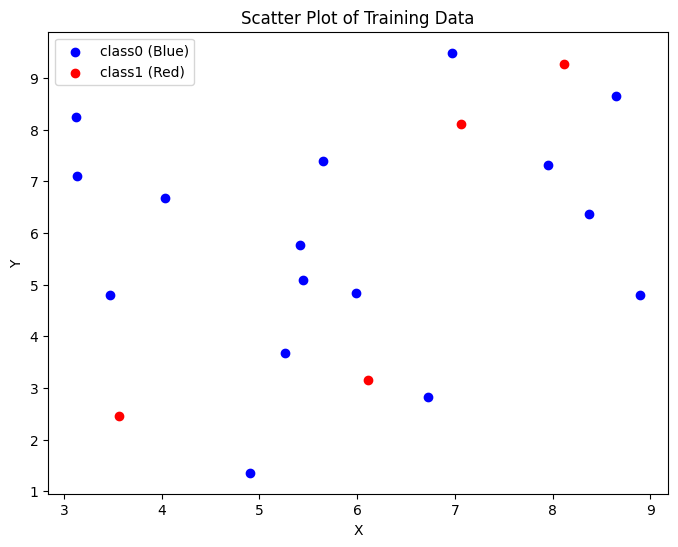

           X         Y   Class
0   8.120681  9.274804  class1
1   3.127345  8.241671  class0
2   5.418198  5.768903  class0
3   7.948300  7.313188  class0
4   4.035346  6.680858  class0
5   6.968086  9.486151  class0
6   8.893776  4.792836  class0
7   5.266442  3.669161  class0
8   3.131773  7.103718  class0
9   8.376986  6.363733  class0
10  6.110205  3.155441  class1
11  5.652947  7.393999  class0
12  4.904172  1.359121  class0
13  3.474244  4.800529  class0
14  8.648370  8.652589  class0
15  3.560026  2.456654  class1
16  6.728139  2.823475  class0
17  7.066968  8.105269  class1
18  5.450538  5.092323  class0
19  5.991251  4.840761  class0


In [8]:
import matplotlib.pyplot as plt
# randomly generating 20 data points for X and Y,in range of 1 to 10
#random is name of the module , it has the function uniform to generate floating values between given 2 values
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

#randomly assigning to different classes
classes = np.random.choice(['class0', 'class1'], size=20)

#creating a DataFrame with X, Y, and Class columns
df = pd.DataFrame({'X': X, 'Y': Y, 'Class': classes})

# Separate the points based on their class
XClass0 = df[df['Class'] == 'class0']['X']
YClass0 = df[df['Class'] == 'class0']['Y']
XClass1 = df[df['Class'] == 'class1']['X']
YClass1 = df[df['Class'] == 'class1']['Y']

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(XClass0, YClass0, c='blue', label='class0 (Blue)')
plt.scatter(XClass1, YClass1, c='red', label='class1 (Red)')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')

plt.legend(loc='best')

plt.show()

# Display the DataFrame
print(df)


ans4)

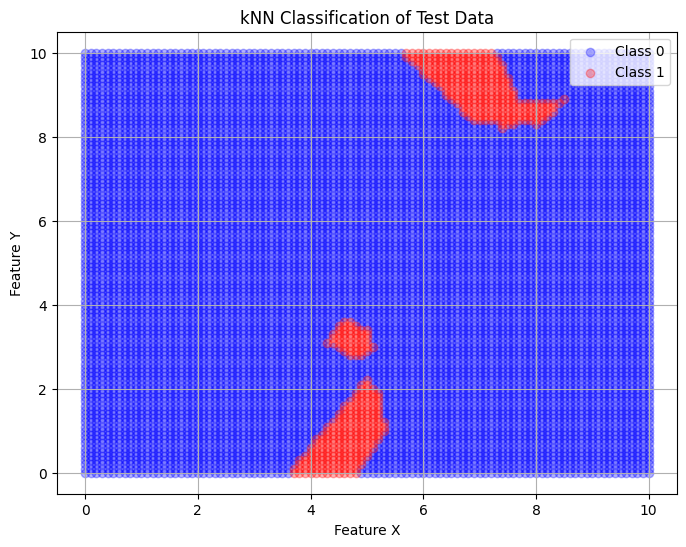

In [9]:
#.arrange() function is used to create testing data , it is faloating values ranging from 0 to 10 incrementing by 0.1
X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
# Generate a meshgrid from the X_test and Y_test arrays (a grid of coordinates)
X_test, Y_test = np.meshgrid(X_test, Y_test)
# Flatten the meshgrid into a DataFrame containing two columns 'X' and 'Y' , .ravel() is used to flatten
test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})

#making a instance of model for k=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(df[['X', 'Y']], df['Class'])

# Classify the test data
test_data['Class'] = model.predict(test_data[['X', 'Y']])

# Plot the points classified as 'class0' in blue with some transparency (alpha=0.3)
# Plot the points classified as 'class1' in red with some transparency (alpha=0.3)
#alpha is transparency

plt.figure(figsize=(8, 6))
plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)

plt.show()


ans5)

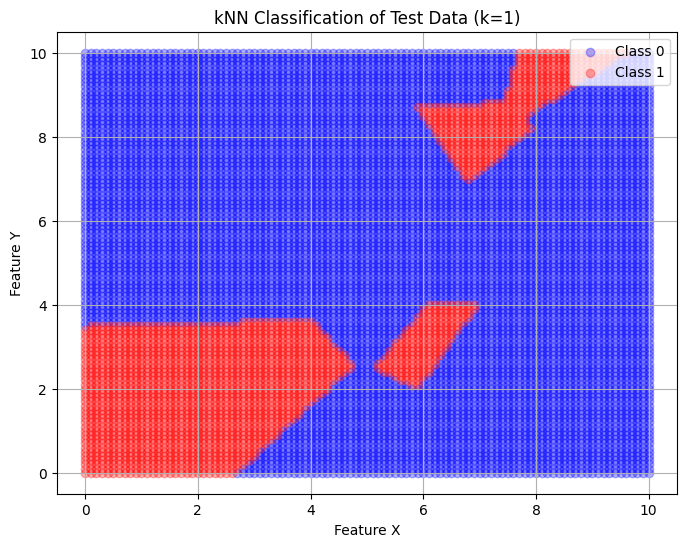

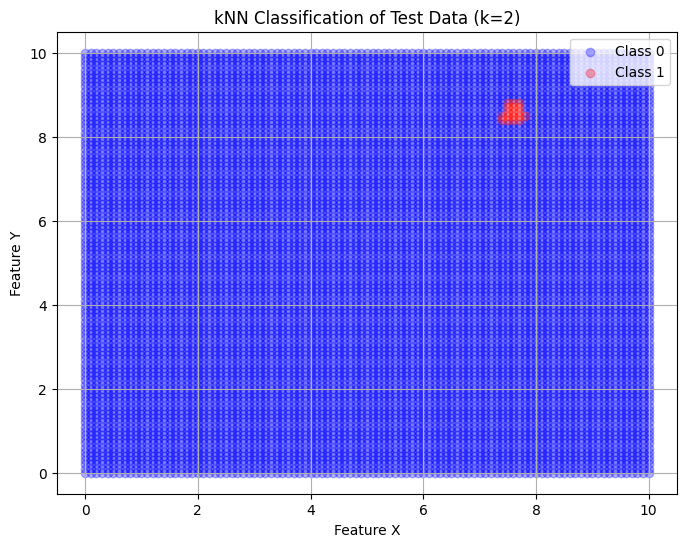

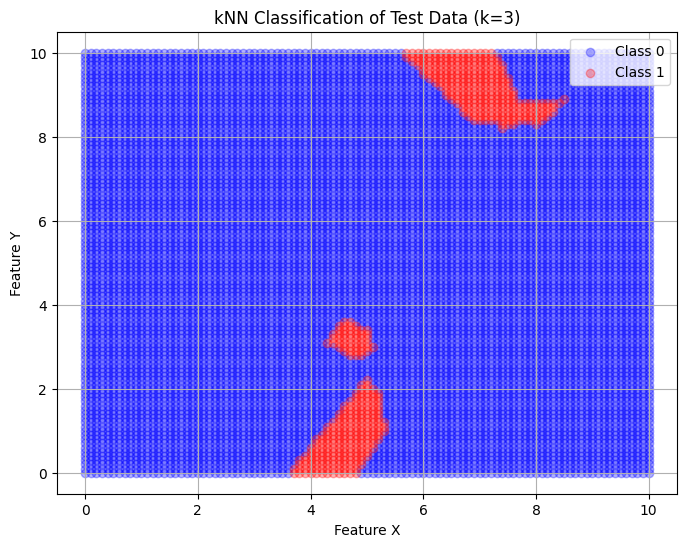

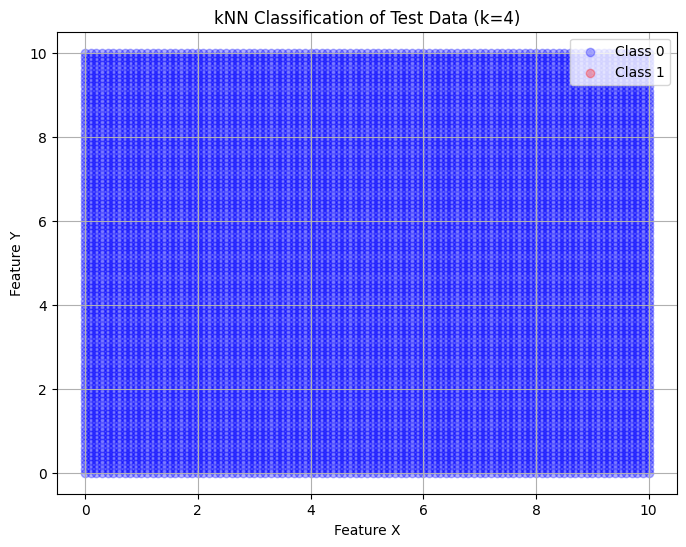

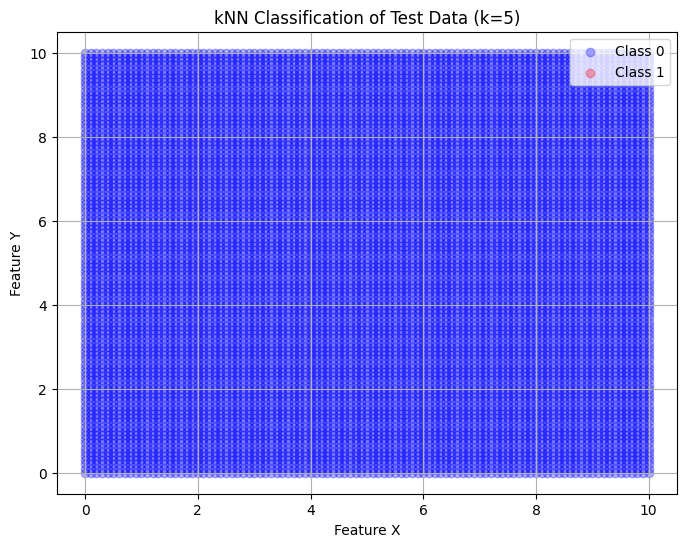

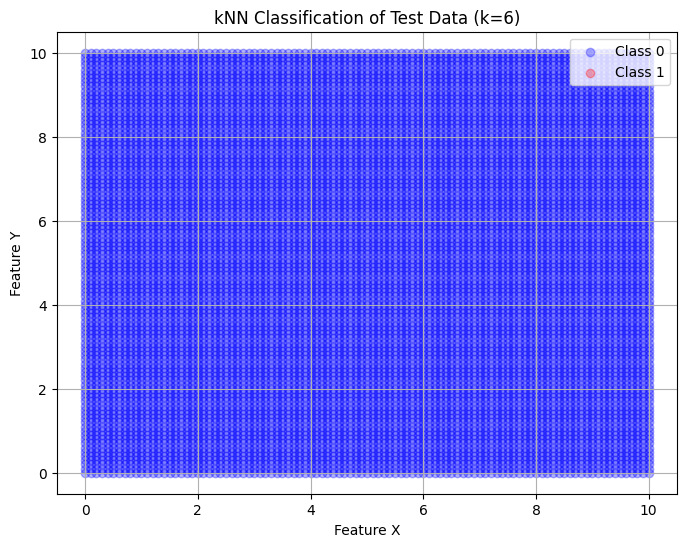

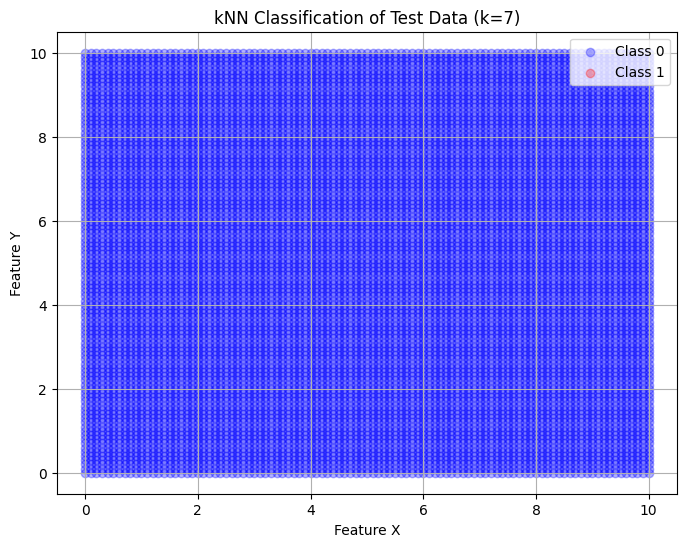

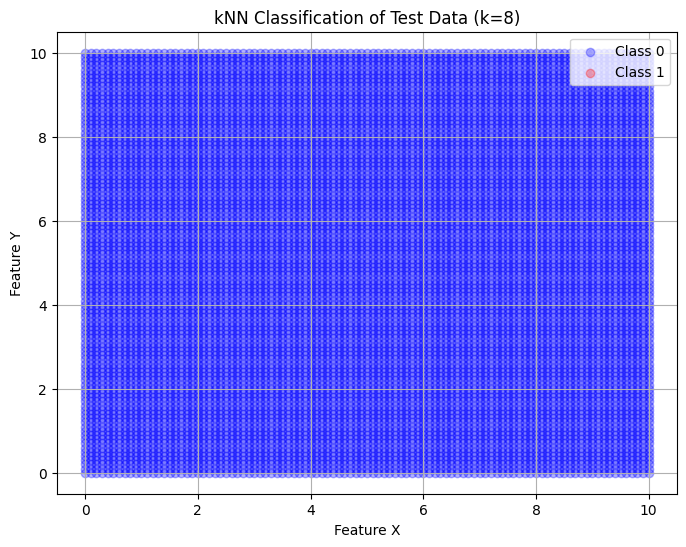

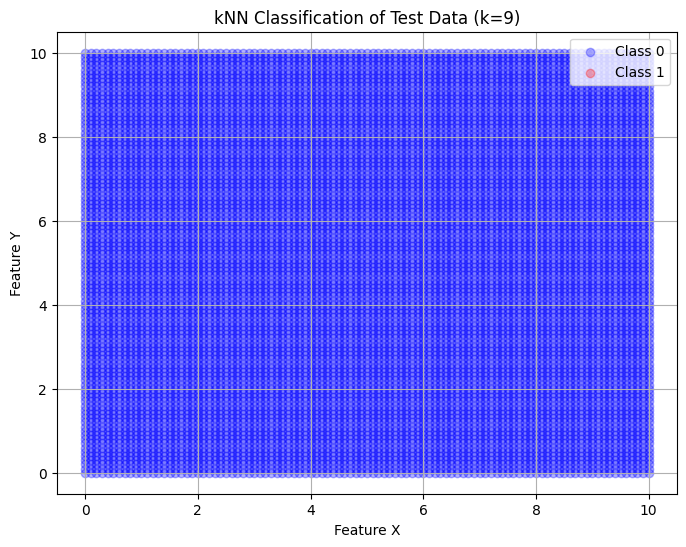

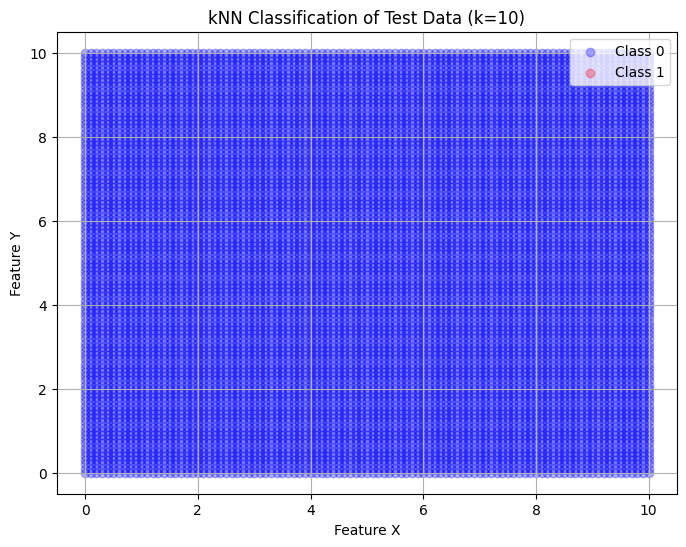

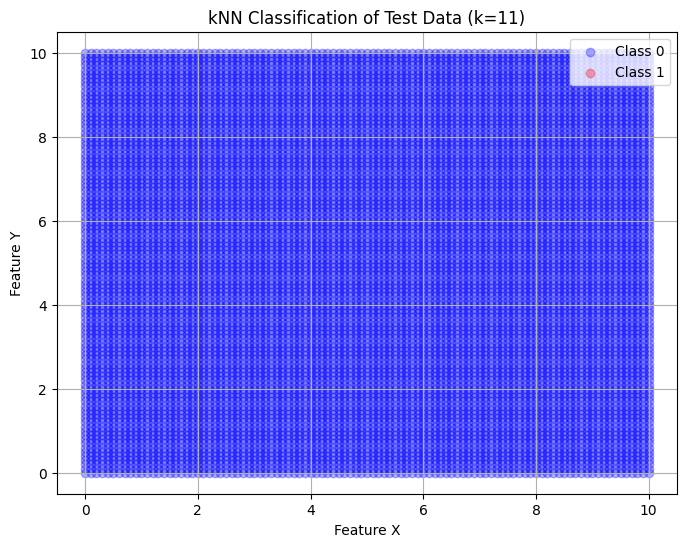

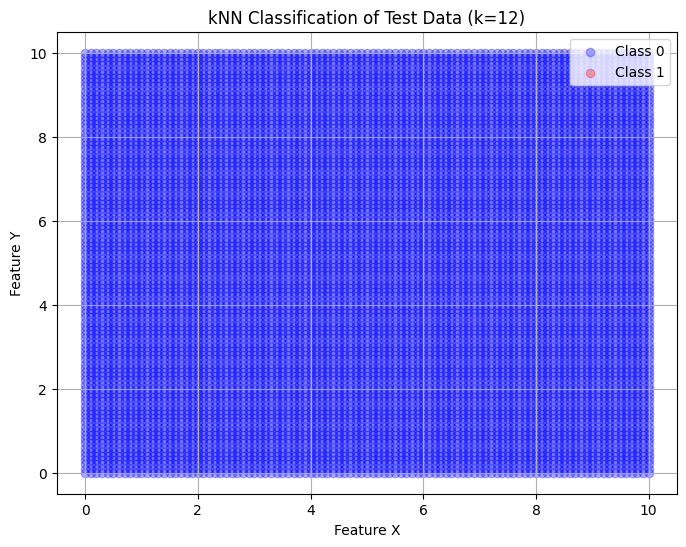

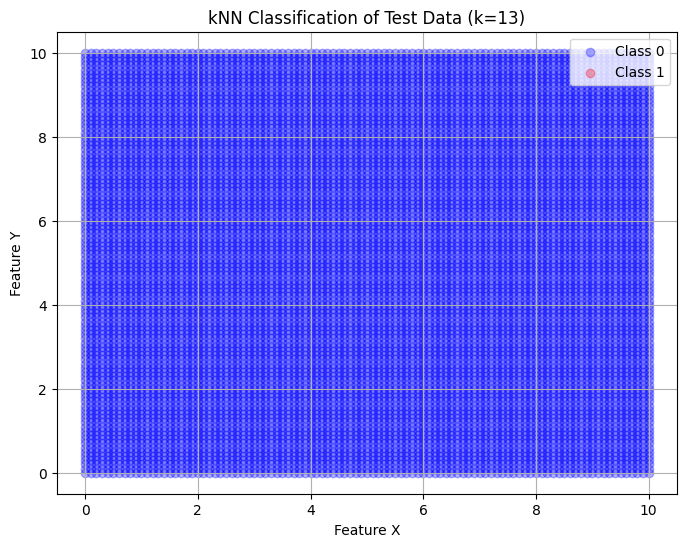

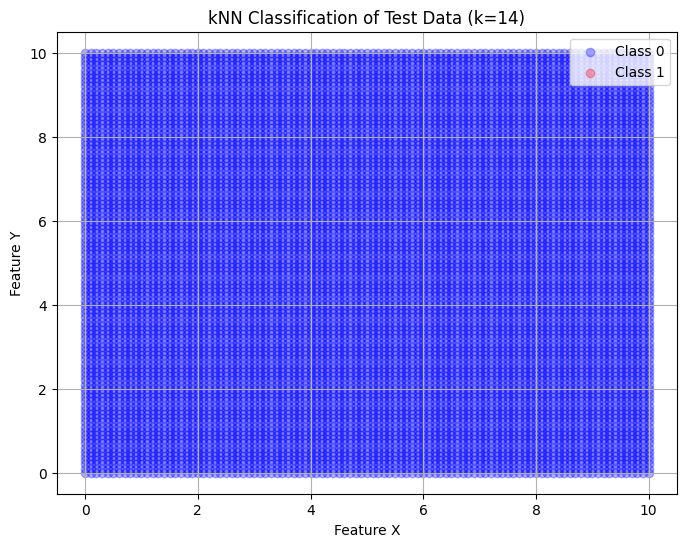

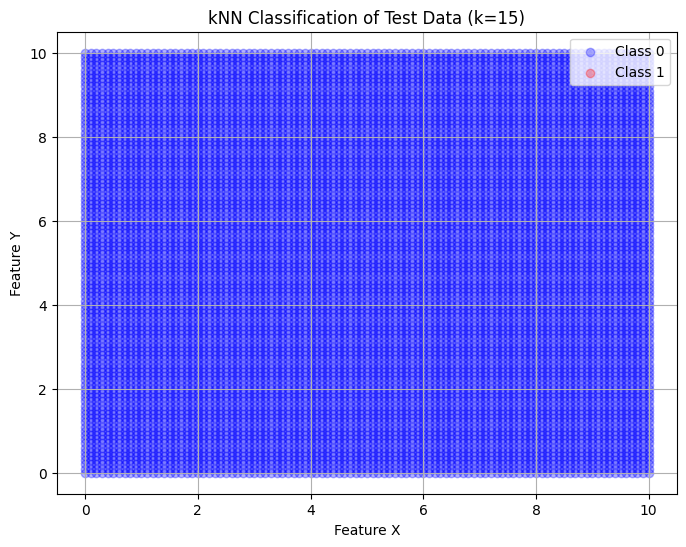

In [12]:
#we plot graphs for different values of k form 1 to 15
for k in range(1, 16):
   #making a instance of the utility class , with k value
    model = KNeighborsClassifier(n_neighbors=k)
    #training the model
    model.fit(df[['X', 'Y']], df['Class'])

    test_data['Class'] = model.predict(test_data[['X', 'Y']])

    plt.figure(figsize=(8, 6))
    plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)

    plt.show()


ans6)

<ipython-input-13-165603da574a>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


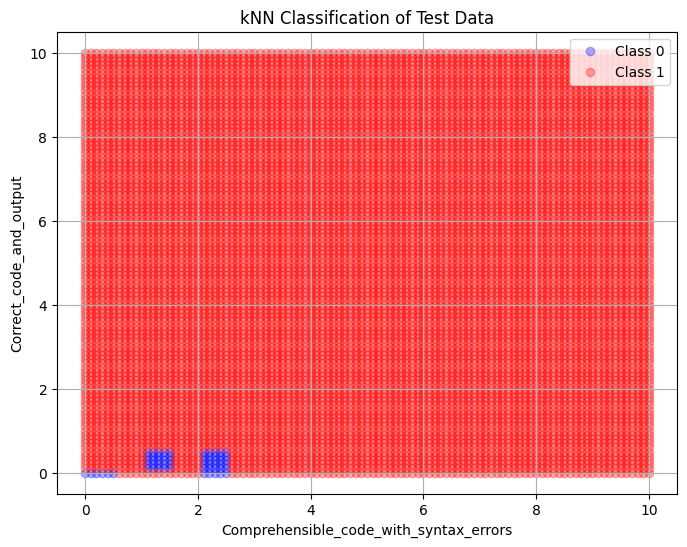

In [13]:
#reading dataset
df = pd.read_excel('dataset.xlsx')
#filling missing values useing pad method
df = df.fillna(method='pad')

#cropping the dataframe on which we have to work on
df = df.iloc[:, 4:10]
#if final score is more than 5 , target value will be 1 , else 0 , these will be the 2 classes
target = [(0 if data < 5 else 1) for data in df['Final_Marks']]
df = df.drop('Final_Marks', axis=1)
df['Target'] = target

#selecting required features
df = df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output','Target']]
test_data = pd.DataFrame({
    'Comprehensible_code_with_syntax_errors': X_test.ravel(),
    'Correct_code_and_output': Y_test.ravel()
})

#making a instance of the utility class , with k value 3
model = KNeighborsClassifier(n_neighbors=3)
#training the model , 2 selected features will be X_train and target column will be Y_train
model.fit(df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']], df['Target'])

# Classify the test data
test_data['Class'] = model.predict(test_data[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 0],
            test_data['Correct_code_and_output'][test_data['Class'] == 0],
            color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 1],
            test_data['Correct_code_and_output'][test_data['Class'] == 1],
            color='red', label='Class 1', alpha=0.3)

plt.xlabel('Comprehensible_code_with_syntax_errors')
plt.ylabel('Correct_code_and_output')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)
plt.show()

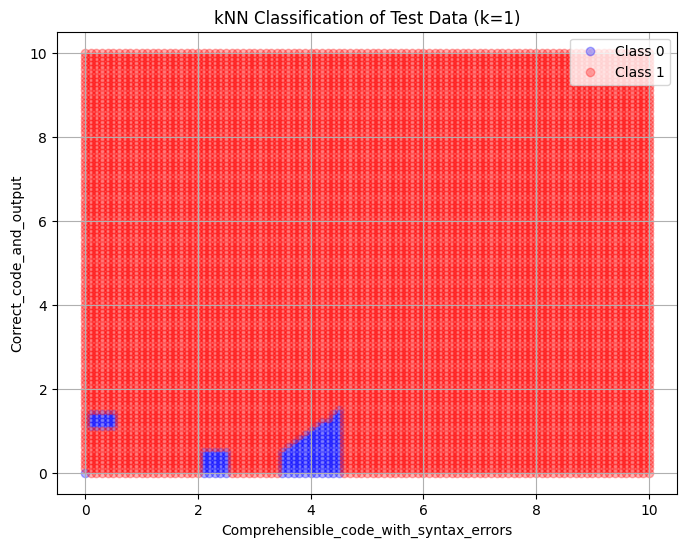

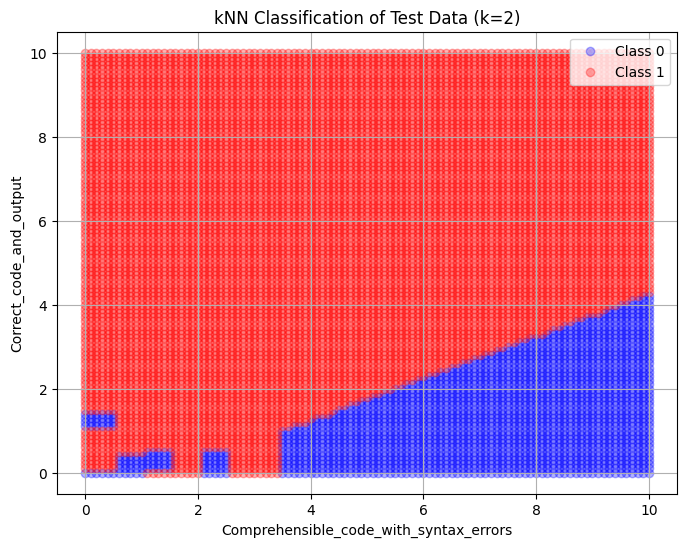

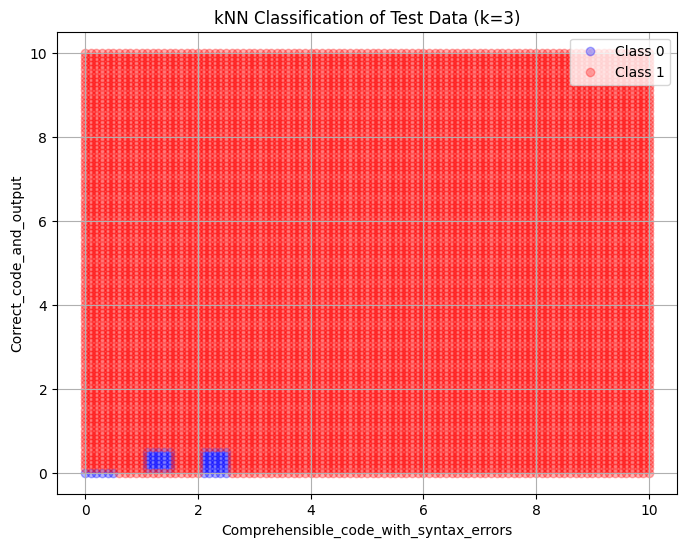

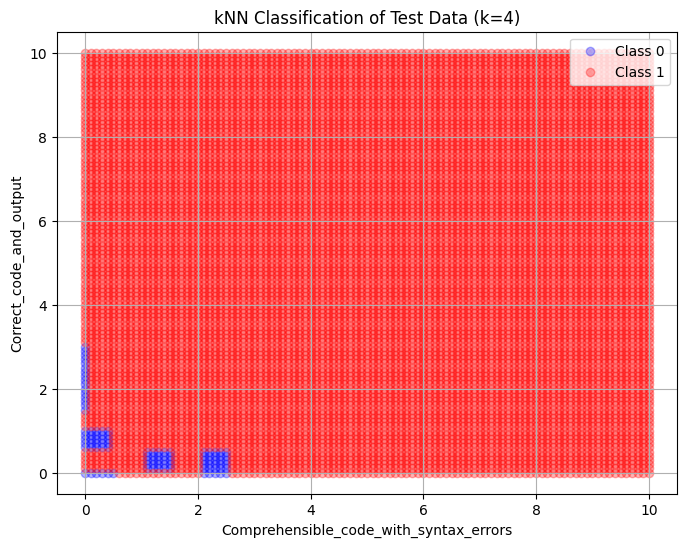

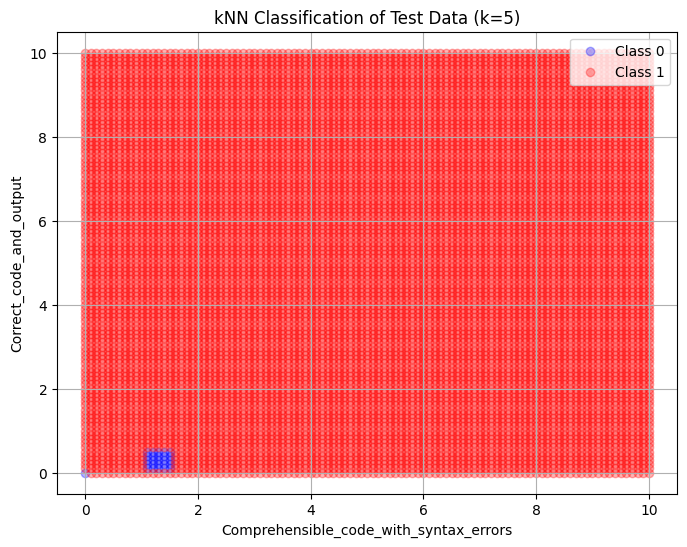

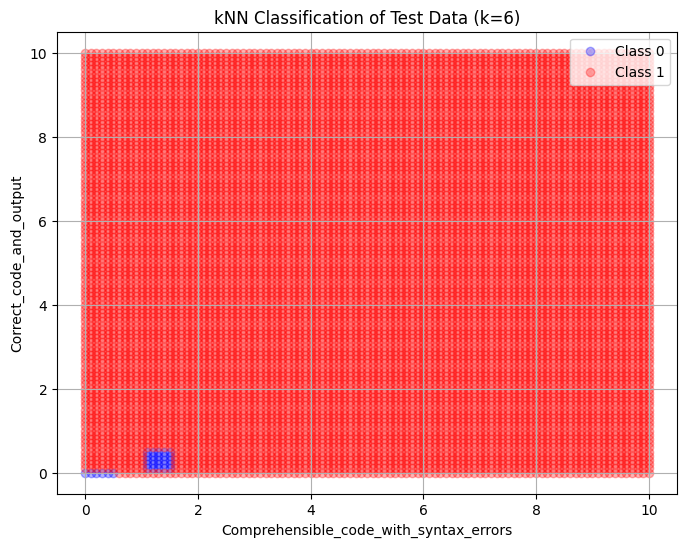

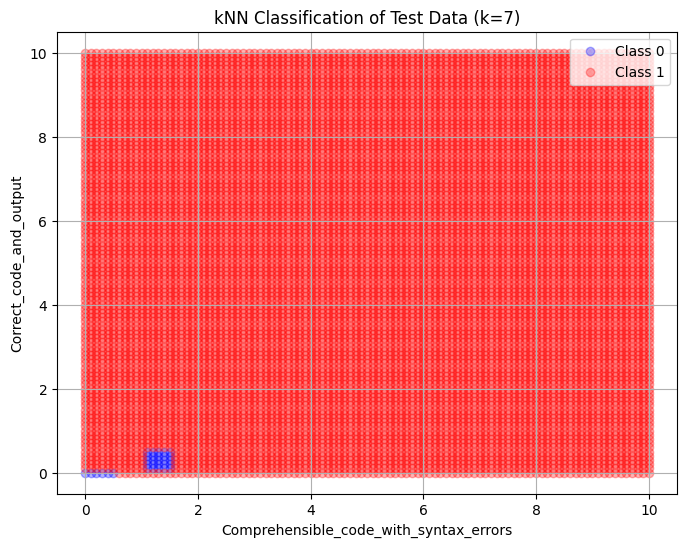

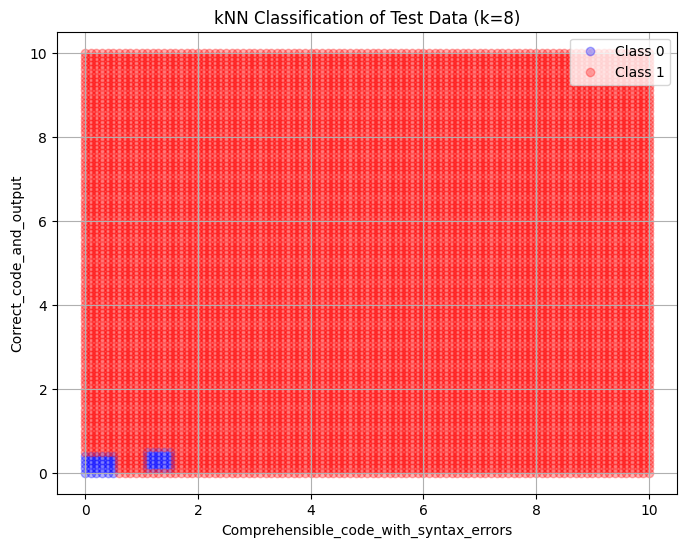

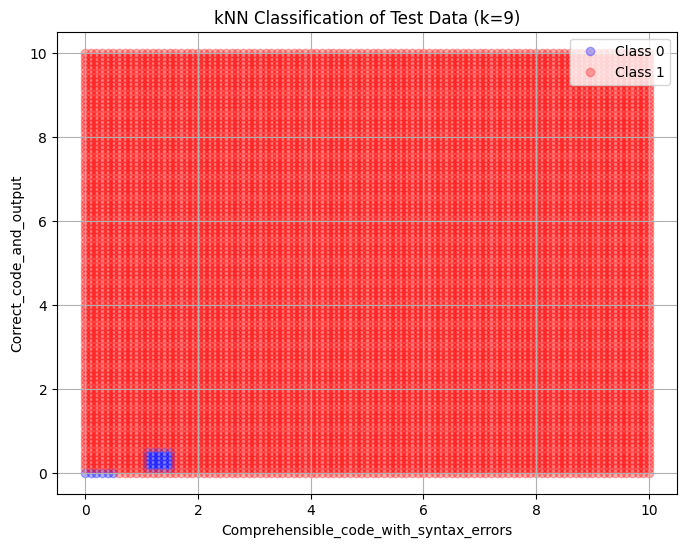

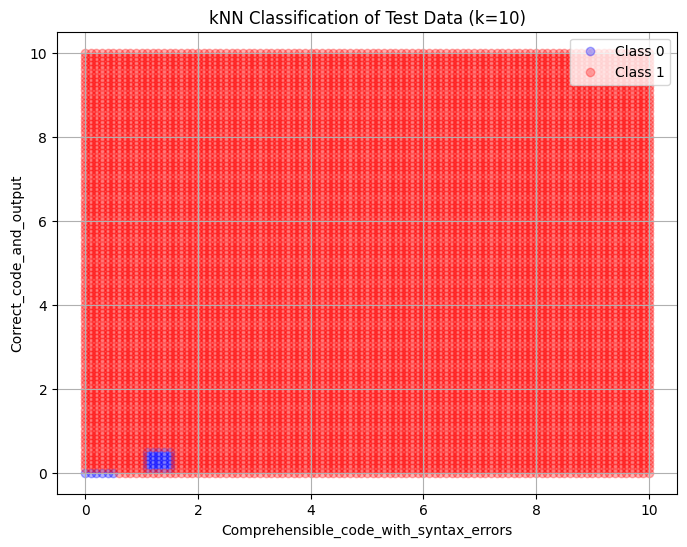

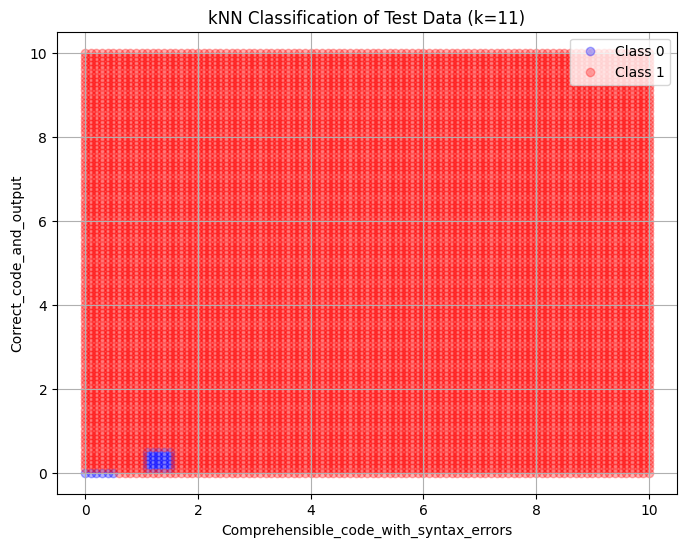

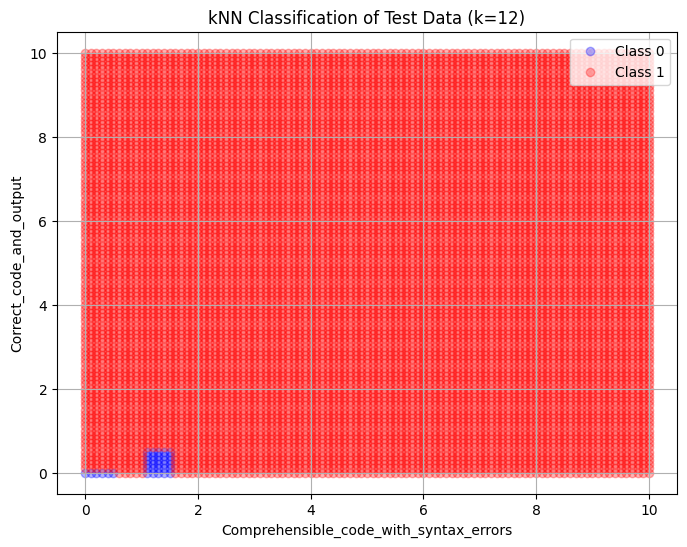

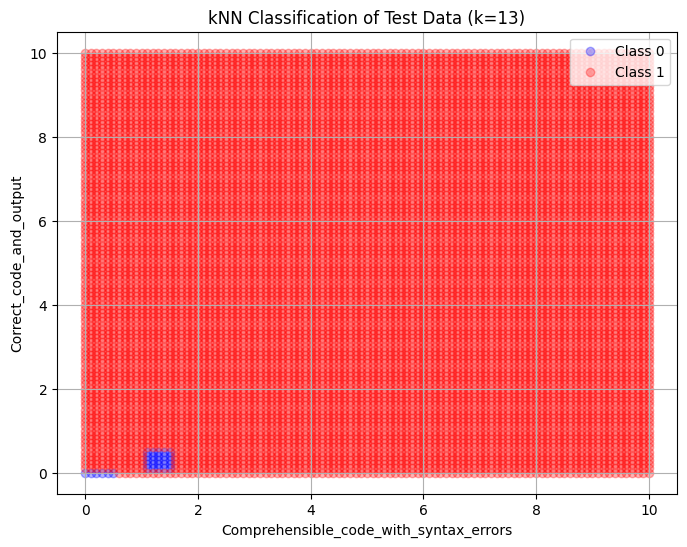

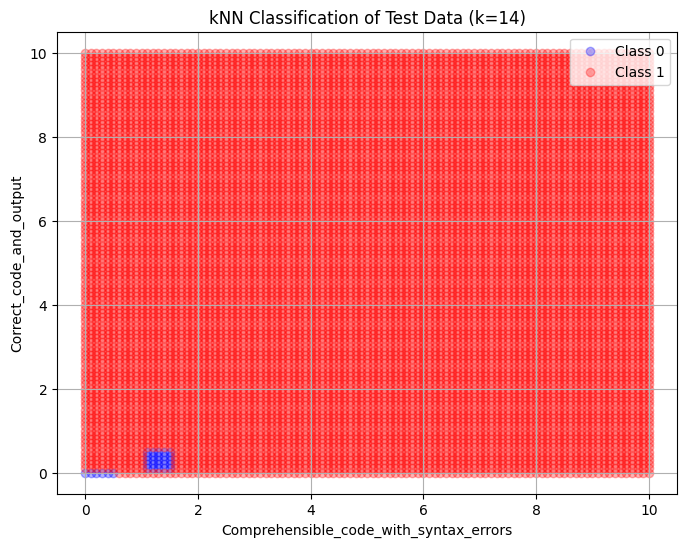

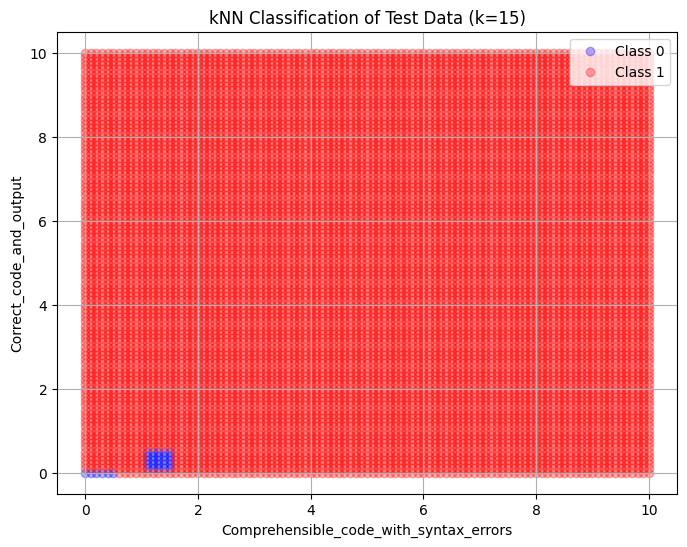

In [14]:
#we plot graphs for different values of k form 1 to 15
for k in range(1, 16):
   #making a instance of the utility class , with k value
    model = KNeighborsClassifier(n_neighbors=k)
    #training the model
    model.fit(df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']], df['Target'])

 #predicting for testing data
    test_data['Class'] = model.predict(test_data[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']])

# Plot the points classified as 'class0' in blue with some transparency (alpha=0.3)
# Plot the points classified as 'class1' in red with some transparency (alpha=0.3)
#alpha is transparency


    # Plotting the results
    plt.figure(figsize=(8, 6)) #figure size
    #rows where class is 0 are selected
    plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 0],
                test_data['Correct_code_and_output'][test_data['Class'] == 0],
                color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 1],
                test_data['Correct_code_and_output'][test_data['Class'] == 1],
                color='red', label='Class 1', alpha=0.3)

    plt.xlabel('Comprehensible_code_with_syntax_errors')
    plt.ylabel('Correct_code_and_output')
    plt.title(f'kNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)

    plt.show()

ans7)

In [16]:
#tool for hyperparameter tuning, different combinations are tried , the one with most optimum performance is selected
from sklearn.model_selection import GridSearchCV
#obtaining accuracy using accuracy_score function , which takes actual and predicted values as input . accuracy is calculated as proportion of correctly predicted to toal instances
from sklearn.metrics import accuracy_score

X = df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']]
y = df['Target']
#k values from 1 to 7 are tried , this param_grid can be given to GridSearchCV
param_grid = {'n_neighbors': range(1, 8)}

#making an instance of model
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")



Best k value: 7
Best cross-validation accuracy: 0.7348
